## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [378]:
mystery_df = pd.read_csv("C:\\Users\\user\\AIT Internship\\mystery_dataset_complex.csv", header = None)
df = mystery_df.copy()

## Data Assessment

In [9]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
15,Michael Rogers,NaN,20-08-2024,"{""monthly"": 5565}",unknown,Y,abc,New Chadport,Belize,NaN,NaN,+1-668-847-4082x455,NaN,NaN,unemployed,"Producer, television/film/video",SQL,R,3,NaN
336,Sara Smith,NaN,NaN,105266,A,Y,NaN,South Joanna,Niue,True,Other,573-140-9335x902,NaN,married,freelancer,"Surveyor, mining",NaN,Tableau,2,NaN
853,Frank Robles,30.0,invalid,"{""monthly"": 37676}",B,no,NaN,Hartland,Western Sahara,True,F,160.874.7160x80309,eyork@yahoo.com,single,NaN,Immigration officer,NaN,R,5,"Ray, Watkins and Werner"
928,Carol Freeman,29.0,"Dec 28, 2022","{""monthly"": 147081}",a,Yes,NaN,Smithshire,Faroe Islands,True,F,(450)789-4554,mwhite@brown.info,NaN,unemployed,"Buyer, retail",SQL,NaN,10,NaN
990,David Ochoa,31.0,01-12-2023,112094,NaN,0,002,Pierceport,Canada,NaN,NaN,001-507-908-0573,NaN,single,NaN,Water quality scientist,Python,Tableau,10,Brown LLC
209,Kevin Medina,NaN,invalid,"{""monthly"": 11832}",c,NaN,002,Smithfort,Armenia,True,Other,(536)508-0098x0530,hsnow@gmail.com,NaN,NaN,Analytical chemist,Python,NaN,3,NaN
52,Felicia Ford,NaN,NaN,"{""monthly"": 28940}",a,NaN,NaN,Lake Ericchester,Antarctica (the territory South of 60 deg S),True,Other,624.579.5091,NaN,single,unemployed,Automotive engineer,NaN,NaN,10,Davis-Allen
268,Alyssa Hernandez,NaN,24-08-2022,103293,NaN,NaN,abc,Port Miguelberg,Lithuania,NaN,M,(263)386-8769x1016,NaN,married,freelancer,Radiation protection practitioner,NaN,PowerBI,1,NaN
461,Carmen Krueger,33.0,2023/03/06,"{""monthly"": 69379}",b,0,abc,Williamsfort,Turkmenistan,NaN,NaN,855-992-0569x141,NaN,single,unemployed,"Editor, magazine features",SQL,R,2,NaN
800,David Perez,60.0,2025/04/01,83979,b,Yes,002,Chavezstad,Bahamas,False,F,+1-231-374-5904,NaN,single,unemployed,"Engineer, automotive",SQL,NaN,5,NaN


In [427]:
# importing the dataset as excell for manual assessment
df.to_excel('df.xlsx')

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       327 non-null    float64
 2   2       789 non-null    object 
 3   3       1000 non-null   object 
 4   4       790 non-null    object 
 5   5       806 non-null    object 
 6   6       672 non-null    object 
 7   7       1000 non-null   object 
 8   8       1000 non-null   object 
 9   9       519 non-null    object 
 10  10      610 non-null    object 
 11  11      1000 non-null   object 
 12  12      346 non-null    object 
 13  13      491 non-null    object 
 14  14      615 non-null    object 
 15  15      1000 non-null   object 
 16  16      593 non-null    object 
 17  17      588 non-null    object 
 18  18      1000 non-null   int64  
 19  19      336 non-null    object 
dtypes: float64(1), int64(1), object(18)
memory usage: 156.4+ KB


In [383]:
df.describe()

,1,18
count,327.000000,1000.000000
mean,42.452599,4.845000
std,13.210543,3.068288
min,18.000000,0.000000
25%,32.000000,2.000000
50%,43.000000,5.000000
75%,54.000000,7.000000
max,65.000000,10.000000


### Column Naming
Based on the sample the interpreted column names are as follows:
- `column 0` : In this column all the sample observations resembles names of peoples, so this column can be renamed as `name`
- `column 1` : This column contains numeric entries ranging from 18 to 65, so we can safely rename the column as `age`
- `column 2` : This column contains dates but these are most likely not DOBs as some of the dates are not even a year old. So this date can be the dates of joining of  the individuals. So, let's call this column `joining_date`
- `column 3` : This column contains json entries but by the look of it it appears to be monthly incomes. So, the column is named as `income`
- `column 4` : This column contains entries like 'a', 'A', 'B', 'C' which in this context and from the given problem statement in the assignmnet are  assumed to be job categories. We call this column `job_category`
- `column 5` : This column contains entries like 'yes', 'Y', 'no', 'N', '0', '1' which can be interpreted as 'yes' and 'no'. This can be about anything but as this is a job related data and with the previous two columns being about income and job category, we assume this column to be about the job being remote or not. So, going forward with that assumption let's call the column `remote`
- `column 7` : The entries of this column are apparently city names so we safely call this column `city`
- `column 8` : Similar to previous column this column's entries are all country names, so we call this column `country`
- `column 10` : This column contains entries like 'M', 'F' and 'other' so clearly with certainty we call this column `gender`
- `column 11` : Clearly, the entries of this column are all phone numbers. So let's call it `phone`
- `column 12` : All the non-null values of this column are email ids, so let's call this column `email`
- `column 13` : This column contains entries like 'married', 'single' specifying marital status. So it is safe to call this column `marital_status`
- `column 14` : This column contains entries like 'employed', 'unemployed', 'freelancer' specifying employment status. So we call this column `employment_status`
- `column 15` : This column contains entries like 'Contractor', 'Web designer' which are job roles. So we call this column `job_role`
- `column 16` : This columns contains entries like 'Python', 'Excell', 'SQL' which can be classified as analytical and dbms tools. So we call these columns as `analytics`
- `column 17` : This columns contains entries like 'R', 'PowerBI', 'Tableau' which can be classified as visualization and dashboard tools. So we call these columns as `dashboard`
- `column 18` : This column contains numeric entries ranging from 0 to 10 which in the context of employment is most likely to be years of experience. So we can safely name the column as `experience`
- `column 19` : The entries of these columns resembles names of companies and and organisations. So let's call this column `company`

Column with index no. 6 contains entries such as '001', '002', 'abc' and column with index no. 9 contains 'True' and 'False' values. It is hard to understand exactly what these two columns are about. So, for now we don't name these columns.

**Note** - There are some contradictions in the dataset, for example a person who is unemployed has a valid job category, sometimes marked yes on remote status, and also has a company name. So we assumed these data to be of their previous job.

In [386]:
df.columns = ['name', 'age', 'joining_date', 'income', 'job_category', 'remote', 'unknown1', 'city', 'country', 'unknown2', 'gender', 
              'phone', 'email', 'marital_status', 'employment_status', 'job_role', 'analytics', 'dashboard', 'experience', 'company']

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1000 non-null   object 
 1   age                327 non-null    float64
 2   joining_date       789 non-null    object 
 3   income             1000 non-null   object 
 4   job_category       790 non-null    object 
 5   remote             806 non-null    object 
 6   unknown1           672 non-null    object 
 7   city               1000 non-null   object 
 8   country            1000 non-null   object 
 9   unknown2           519 non-null    object 
 10  gender             610 non-null    object 
 11  phone              1000 non-null   object 
 12  email              346 non-null    object 
 13  marital_status     491 non-null    object 
 14  employment_status  615 non-null    object 
 15  job_role           1000 non-null   object 
 16  analytics          593 no

### Assessing key categorical columns

In [391]:
# job_category
df['job_category'].unique()

array(['a', 'unknown', 'b', 'C', nan, 'c', 'A', 'B'], dtype=object)

In [393]:
# remote
df['remote'].unique()

array(['no', 'No', 'yes', 'Y', nan, 'Yes', 'N', '0', '1'], dtype=object)

In [395]:
# gender
df['gender'].unique()

array([nan, 'M', 'F', 'Other'], dtype=object)

In [397]:
# marital_status
df['marital_status'].unique()

array([nan, 'single', 'married'], dtype=object)

In [399]:
# employment_status
df['employment_status'].unique()

array(['employed', 'freelancer', nan, 'unemployed'], dtype=object)

In [401]:
# analytics
df['analytics'].unique()

array(['Excel', 'Python', nan, 'SQL'], dtype=object)

In [403]:
# dashboard
df['dashboard'].unique()

array(['PowerBI', 'Tableau', 'R', nan], dtype=object)

### Issues in Data
- `age` : Contains missing values and can be converted to int32
- `joining_date` : Inconsistent date formats and can be converted to date-time
- `income` : Contains json embedded texts and can be converted to int32
- `job_category` : Inconsistency in letter case and can be converted to category
- `remote` : Contains 'no', 'No', 'yes', 'Y', nan, 'Yes', 'N', '0', '1', but should just contain 'yes' and 'no' and can be converted to category
- `gender` : Contains missing values and can be converted to category
- `email` : Contains missing values
- `marital_status` : Contains missing values and can be coverted to category
- `employment_status` : Contains missing values and can be coverted to category
- `analytics` : Contains missing values and can be coverted to category
- `dashboard` : Contains missing values and can be coverted to category
- `experience` : Can be coverted to int32
- `company` : Contains missing values

## Data Cleaning

#### age
Nothing can be done for the missing values here but we won't drop the rows either. So we just change its datatype

In [408]:
df['age'] = df['age'].astype('Int32')

#### joining_date
This column contains 'invalid' which is string, so we convert it na and change the column into date-time

In [411]:
df['joining_date'] = df['joining_date'].replace({'invalid': np.nan})
df['joining_date'] = pd.to_datetime(df['joining_date'], format = 'mixed')

#### income
It contains json strings but the monthly incomes can be extracted using str operation

In [414]:
def extract_income(s):
    if s.startswith('{'):
        return s.split(' ')[1].split('}')[0]
    else:
        return s

In [416]:
df['income'] = df['income'].apply(extract_income).astype('Int32')

#### job_category
Here, first we convert the small case letters to upper case, the change the null values to 'Unknown' and finally change the dtype to category

In [419]:
df['job_category'] = df['job_category'].str.capitalize()
df['job_category'] = df['job_category'].fillna('Unknown')
df['job_category'] = df['job_category'].astype('category')

#### remote
Change these {'yes', 'Y', 'Yes', '1'} values to 'Yes' and these {'no', 'No', 'N', '0'} values to 'No'. We keep the na values as it is.

In [422]:
def convert_remote(x):
    if x in ['yes', 'Y', 'Yes', '1']:
        return 'Yes'
    elif x in ['no', 'No', 'N', '0']:
        return 'No'
    else:
        return pd.NA

In [424]:
df['remote'] = df['remote'].apply(convert_remote)
df['remote'] = df['remote'].astype('category')

#### gender
Contains missing values but nothing can be done so keep them as it is. And we change the dtype to categories

In [427]:
df['gender'] = df['gender'].astype('category')

#### marital_status
Nothing can be done for the na values but we change the dtype to categories

In [430]:
df['marital_status'] = df['marital_status'].astype('category')

#### employment_status
Contains missing values but we keep them as they are and just change the dtype

In [433]:
df['employment_status'] = df['employment_status'].astype('category')

#### analytics and dashboard
Both the columns contains missing values and we change them into 'Other' as people who are not from the IT can have other skill. Also we change the dtype to category

In [436]:
df['analytics'] = df['analytics'].fillna('Other')
df['analytics'] = df['analytics'].astype('category')

df['dashboard'] = df['dashboard'].fillna('Other')
df['dashboard'] = df['dashboard'].astype('category')

#### experience
Convert it to int32

In [439]:
df['experience'] = df['experience'].astype('Int32')

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               1000 non-null   object        
 1   age                327 non-null    Int32         
 2   joining_date       556 non-null    datetime64[ns]
 3   income             1000 non-null   Int32         
 4   job_category       1000 non-null   category      
 5   remote             806 non-null    category      
 6   unknown1           672 non-null    object        
 7   city               1000 non-null   object        
 8   country            1000 non-null   object        
 9   unknown2           519 non-null    object        
 10  gender             610 non-null    category      
 11  phone              1000 non-null   object        
 12  email              346 non-null    object        
 13  marital_status     491 non-null    category      
 14  employmen

## Exploratory Data Analysis
Let us first identify the important columns which we will be using in our analysis<br>
**Numerical** - age, income, experience<br>
**Categorical** - job_category, remote, gender, marital_status, employment_status, analytics, dashboard

### Demographic Distribution

#### Age

In [446]:
df['age'].isnull().sum()

673

In [448]:
df['age'].describe()

count        327.0
mean     42.452599
std      13.210543
min           18.0
25%           32.0
50%           43.0
75%           54.0
max           65.0
Name: age, dtype: Float64

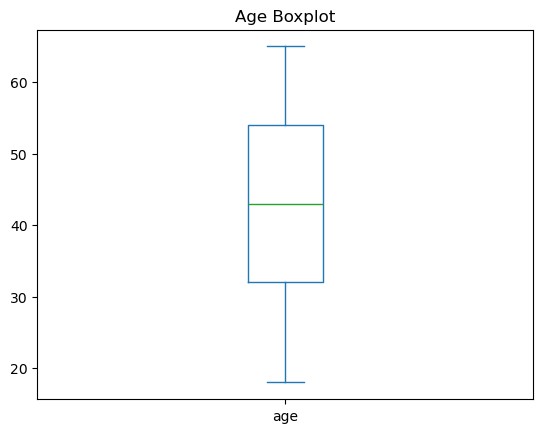

In [450]:
df['age'].plot(kind = 'box', title = 'Age Boxplot')
plt.show()

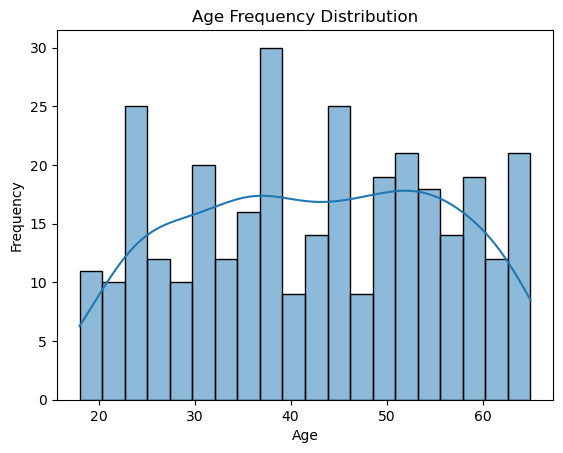

In [452]:
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Frequency Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Gender

In [455]:
df['gender'].isnull().sum()

390

In [457]:
df['gender'].value_counts()

gender
F        216
M        201
Other    193
Name: count, dtype: int64

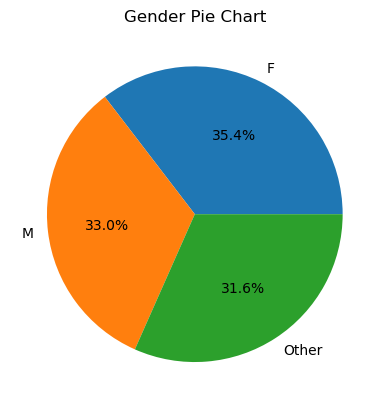

In [459]:
df['gender'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', title = 'Gender Pie Chart', ylabel = '')
plt.show()

#### Marital status

In [462]:
df['marital_status'].isnull().sum()

509

In [464]:
df['marital_status'].value_counts()

marital_status
single     247
married    244
Name: count, dtype: int64

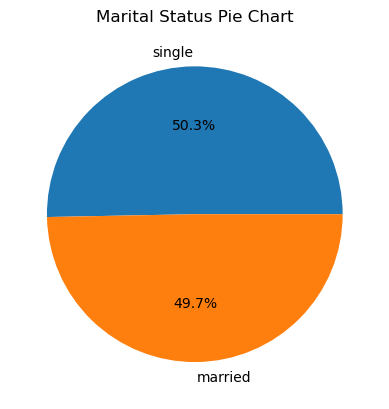

In [466]:
df['marital_status'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', title = 'Marital Status Pie Chart', ylabel = '')
plt.show()

#### Country

In [469]:
df['country'].value_counts()

country
Guatemala                       10
India                           10
French Guiana                   10
Aruba                            9
Netherlands                      9
                                ..
Cambodia                         1
Ireland                          1
Mauritius                        1
United States Virgin Islands     1
Moldova                          1
Name: count, Length: 236, dtype: int64

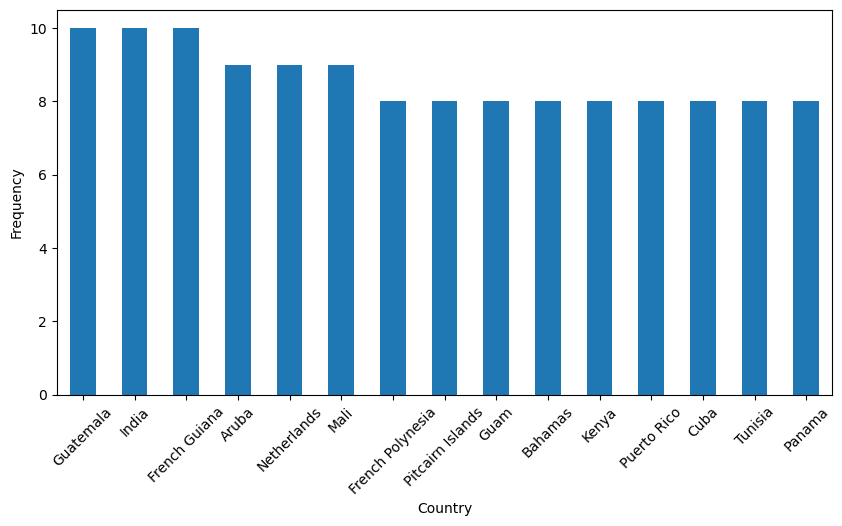

In [471]:
df['country'].value_counts().head(15).plot(kind = 'bar', figsize = (10,5), xlabel = 'Country', ylabel = 'Frequency', rot = 45)
plt.show()

**Observations** 
- Age ranges from 18 to 65, with a median age of 43 and follows a random unfamiliar distribution(not normal).
- 33% male, 35% female and 32% other showing diversity in data.
- Almost equal amount of married and single people.
- People from 236 countries with top 3 countries with most number of people being Guatemala, India and French Guiana.
- Almost 67%, 40% and 50% missing values in age, gender and marital status respectively.

### Employment Characteristics

#### Employment status

In [476]:
df['employment_status'].isnull().sum()

385

In [478]:
df['employment_status'].value_counts()

employment_status
freelancer    231
employed      194
unemployed    190
Name: count, dtype: int64

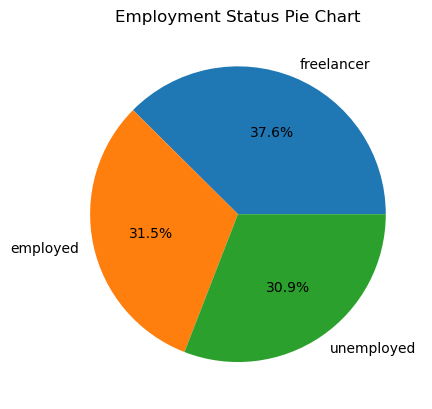

In [480]:
df['employment_status'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', title = 'Employment Status Pie Chart', ylabel = '')
plt.show()

#### Is Remote

In [483]:
df['remote'].isnull().sum()

194

In [485]:
df['remote'].value_counts()

remote
No     422
Yes    384
Name: count, dtype: int64

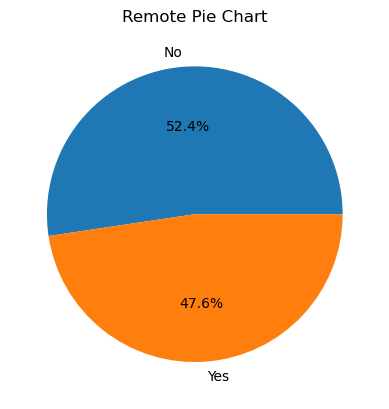

In [487]:
df['remote'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', title = 'Remote Pie Chart', ylabel = '')
plt.show()

#### Job Category

In [490]:
df['job_category'].value_counts()

job_category
Unknown    319
B          258
A          215
C          208
Name: count, dtype: int64

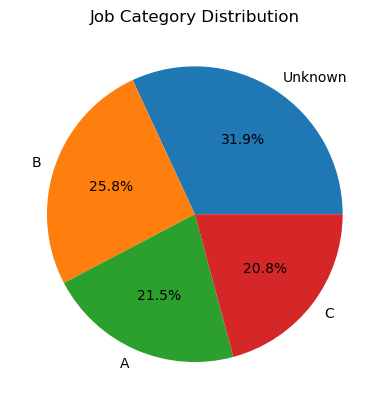

In [492]:
df['job_category'].value_counts().plot(kind = 'pie', title = 'Job Category Distribution', ylabel = '', autopct = '%0.1f%%')
plt.show()

#### Income

In [495]:
df['income'].describe()

count          1000.0
mean        78321.424
std      43090.021319
min            5410.0
25%           40244.5
50%           77845.5
75%          116656.0
max          149919.0
Name: income, dtype: Float64

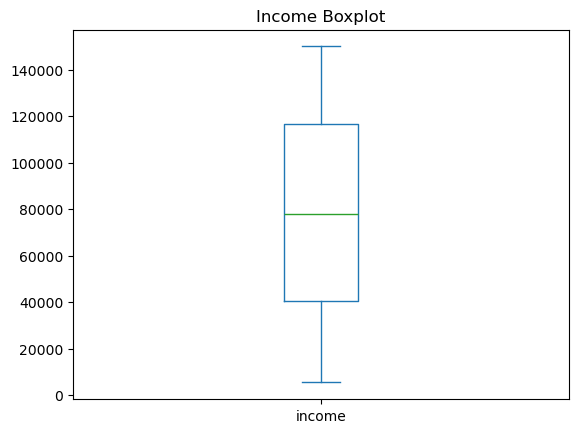

In [497]:
df['income'].plot(kind = 'box', title = 'Income Boxplot')
plt.show()

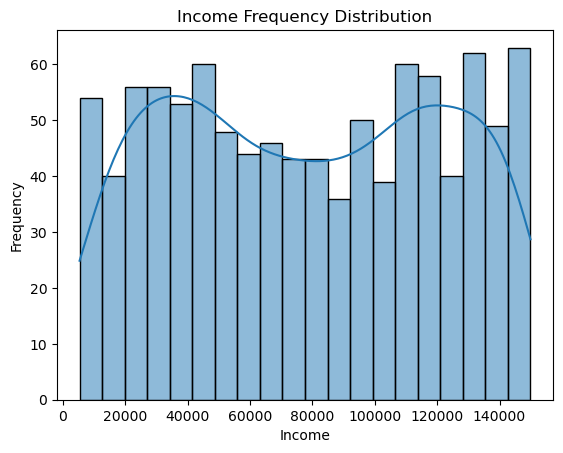

In [499]:
sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Frequency Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#### Experience

In [502]:
df['experience'].describe()

count      1000.0
mean        4.845
std      3.068288
min           0.0
25%           2.0
50%           5.0
75%           7.0
max          10.0
Name: experience, dtype: Float64

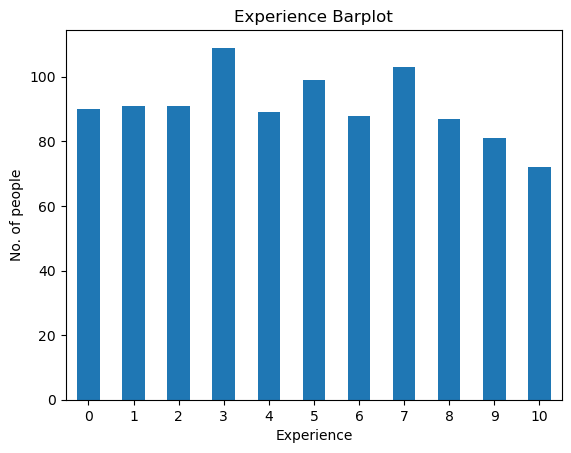

In [504]:
df['experience'].value_counts().sort_index().plot(kind = 'bar', title = 'Experience Barplot', xlabel = 'Experience', ylabel = 'No. of people', rot = 0)
plt.show()

**Observations**
- Almost equal proportion(31%) of peoples are employed and unemployed, and 38% of freelancers.
- Almost 47% of people has a remote job.
- Unknown categories dominates the data with 32% occurrence, and among known categories A and C have almost equal occurrence at 20% and B has an occurrence of 25%.
- The income ranges from approx 5k to 150k showing data contains individuals of all economic backgrounds.
- The bar plot seems uniform upto 7 years and after that it starts to decrease showing less people with more than 7 years of experience.
- Almost 40% and 20% missing values in employment status and remote column.

### Skills Distribution

In [508]:
df['analytics'].value_counts()

analytics
Other     407
SQL       206
Excel     202
Python    185
Name: count, dtype: int64

In [510]:
df['dashboard'].value_counts()

dashboard
Other      412
R          203
PowerBI    195
Tableau    190
Name: count, dtype: int64

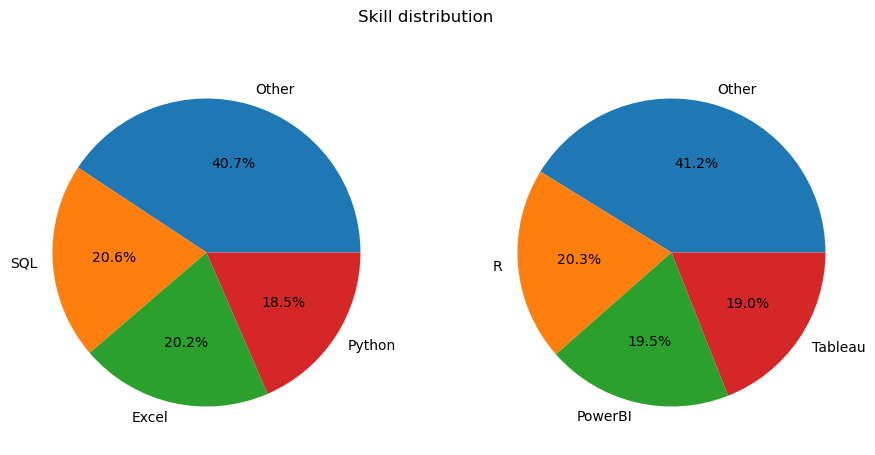

In [512]:
fig, ax = plt.subplots(1,2, figsize = (11,5))
ax[0].pie(df['analytics'].value_counts(), labels = df['analytics'].value_counts().index, autopct = '%0.1f%%')
ax[1].pie(df['dashboard'].value_counts(), labels = df['dashboard'].value_counts().index, autopct = '%0.1f%%')
fig.suptitle('Skill distribution')
plt.show()

In [514]:
((df['analytics'] == 'Other') & (df['dashboard'] == 'Other')).sum()

176

In [516]:
((df['analytics'] != 'Other') & (df['dashboard'] != 'Other')).sum()

357

**Observations**
- Almost 18% of the people doesn't have any one of the key skills, almost 46% people has atleast one of the key skills and 36% people has 2 of the key skills.
- Each key skill is known by almost 20% of the people.

### Income Distribution

#### Income Distrubution by Job Category

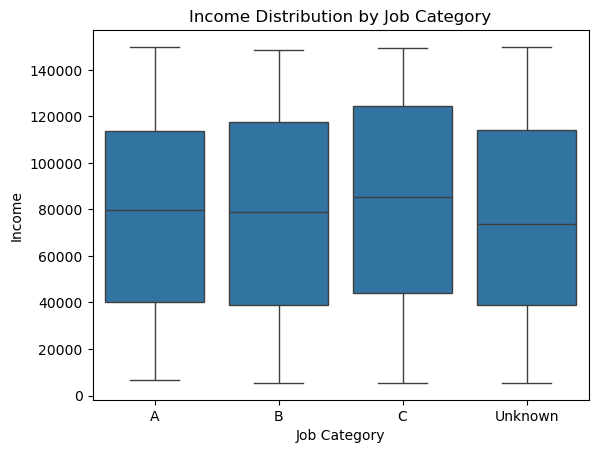

In [521]:
sns.boxplot(data = df, x = 'job_category', y = 'income')
plt.title('Income Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Income')
plt.show()

In [523]:
df.groupby('job_category', observed = True)['income'].mean()

job_category
A          77884.604651
B          78482.844961
C          82502.461538
Unknown    75759.084639
Name: income, dtype: Float64

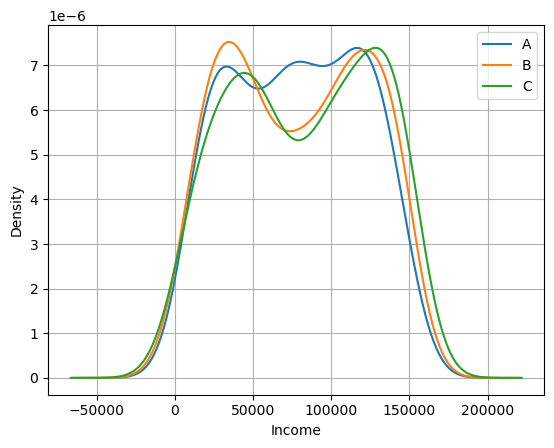

In [525]:
df[df['job_category'] == 'A']['income'].plot(kind = 'kde', label = 'A')
df[df['job_category'] == 'B']['income'].plot(kind = 'kde', label = 'B')
df[df['job_category'] == 'C']['income'].plot(kind = 'kde', label = 'C')
plt.legend()
plt.xlabel('Income')
plt.grid()
plt.show()

**Observation:** Intersetingly if we follow the initial assumption of calling the column 'job category', then according to the plots the people with a job of category C has overall income more that than people with category A and B jobs. This might be the case where the categories are hierarchically reverse ordered or we might have got our assumption wrong.

#### Income Distribution by Remote Status

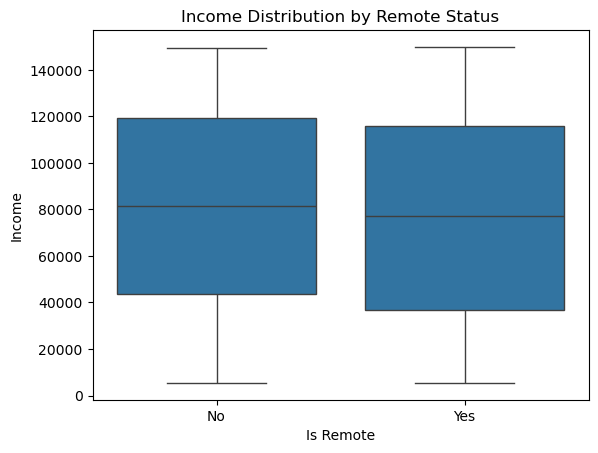

In [529]:
sns.boxplot(data = df, x = 'remote', y = 'income')
plt.title('Income Distribution by Remote Status')
plt.xlabel('Is Remote')
plt.ylabel('Income')
plt.show()

In [531]:
df.groupby('remote', observed = True)['income'].mean()

remote
No     81091.917062
Yes    76271.776042
Name: income, dtype: Float64

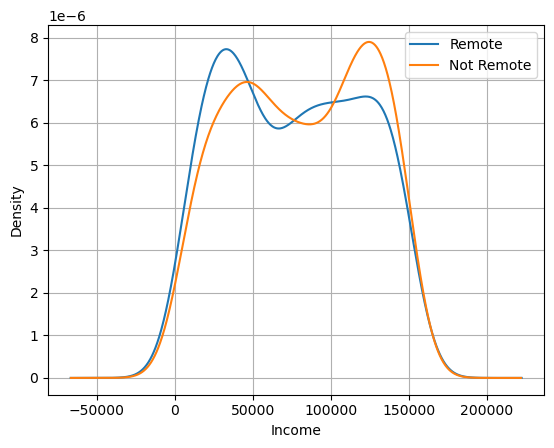

In [533]:
df[df['remote'] == 'Yes']['income'].plot(kind = 'kde', label = 'Remote')
df[df['remote'] == 'No']['income'].plot(kind = 'kde', label = 'Not Remote')
plt.legend()
plt.xlabel('Income')
plt.grid()
plt.show()

**Observation:** With a salary of more than 100k a job is more likely to be a non remote job which can be because of companies wanting their employees to come to office when they are paid high, whereas for a job of less than 50k the company is more open to remote positions, which also explains the higher avg salary in non remote jobs.

#### Income Distribution by Age

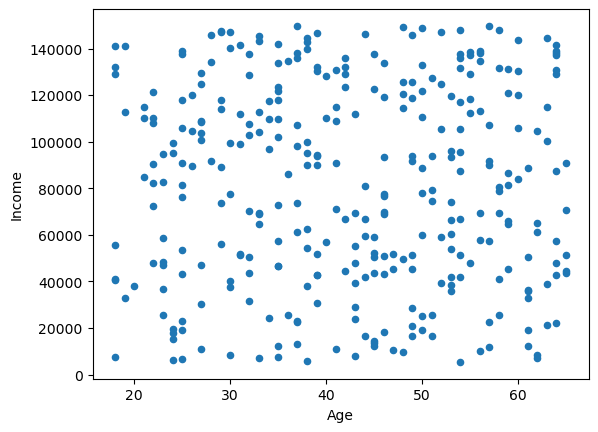

In [537]:
df.plot(kind = 'scatter', x = 'age', y = 'income', xlabel = 'Age', ylabel = 'Income')
plt.show()

In [539]:
df['age'].corr(df['income'])

-0.012264160590660413

**Conclusion:** There is absolutely no correlation between income and age.

#### Income Distribution by Gender

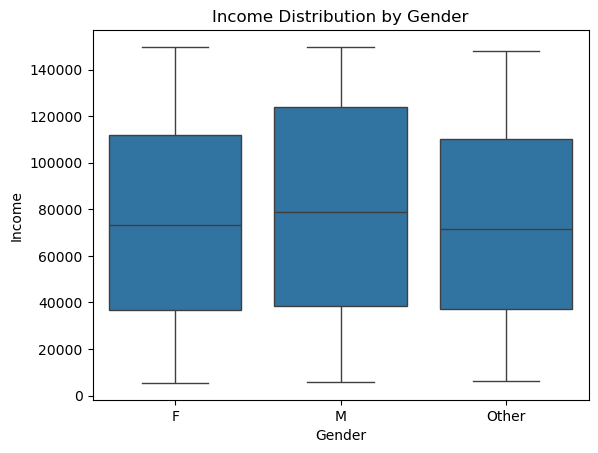

In [543]:
sns.boxplot(data = df, x = 'gender', y = 'income')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

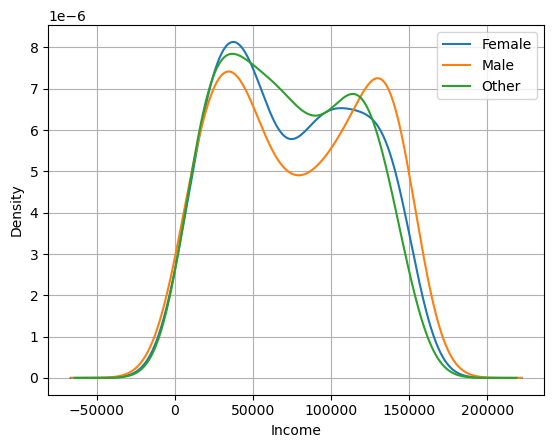

In [545]:
df[df['gender'] == 'F']['income'].plot(kind = 'kde', label = 'Female')
df[df['gender'] == 'M']['income'].plot(kind = 'kde', label = 'Male')
df[df['gender'] == 'Other']['income'].plot(kind = 'kde', label = 'Other')
plt.legend()
plt.xlabel('Income')
plt.grid()
plt.show()

In [547]:
gender_avg = df.groupby('gender', observed = True)['income'].mean()
print((gender_avg.iloc[1] - gender_avg.iloc[0])/gender_avg.iloc[1]*100, '%')
print((gender_avg.iloc[1] - gender_avg.iloc[2])/gender_avg.iloc[1]*100, '%')

5.381381306495902 %
7.653064131181312 %


**Observations**
- On average a man earns 5.4% more than a woman and 7.6% more than other genders.
- Proportion of female and other genders are more than male in jobs with salary less than 120k, but men dominates in jobs with more than 120k salary explaining the avg pay disparity.

#### Income Distribution by Skills

In [551]:
df.groupby(['analytics', 'dashboard'], observed = True)['income'].mean().sort_values(ascending = False)

analytics  dashboard
Python     PowerBI      90920.394737
Excel      Other           86780.725
Other      Tableau      85489.666667
           R                81617.08
SQL        PowerBI      80110.690476
           Tableau       79368.65625
           R            77239.645833
Python     Tableau       77180.02381
Excel      Tableau      77025.268293
Other      Other        76548.340909
Python     Other        76336.791667
Excel      R             75361.87234
Other      PowerBI      74825.765432
SQL        Other        72931.261905
Excel      PowerBI      72848.441176
Python     R            66809.515152
Name: income, dtype: Float64

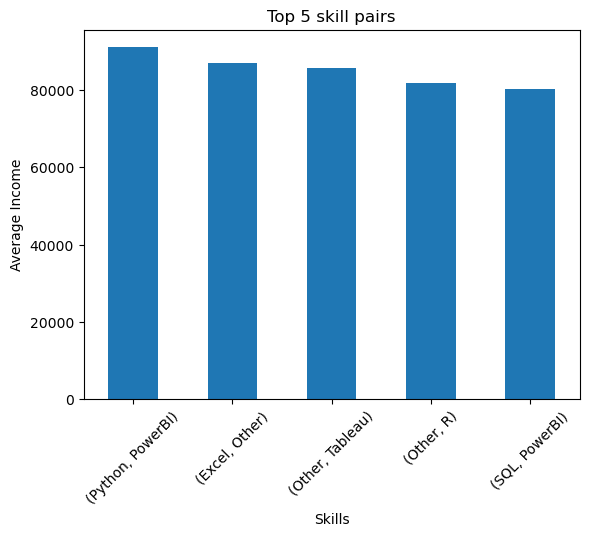

In [553]:
skill_avg = df.groupby(['analytics', 'dashboard'], observed = True)['income'].mean().sort_values(ascending = False)
skill_avg.head(5).plot(kind = 'bar', title = 'Top 5 skill pairs', xlabel = 'Skills', ylabel = 'Average Income', rot = 45)
plt.show()

In [555]:
(skill_avg.iloc[0] - df['income'].mean())/skill_avg.iloc[0]*100

13.857144783970943

**Observation:** People who knows Python and PowerBI together earns almost 14% more on an average than the average income.

#### Income Distribution by Experience

In [559]:
df.groupby('experience')['income'].mean().sort_values(ascending = False)

experience
10    84235.972222
0     82974.077778
4     82190.382022
2      79878.78022
3     79542.376147
6     78939.397727
8     78073.551724
5     75700.282828
7     75070.058252
1     73853.736264
9     72202.901235
Name: income, dtype: Float64

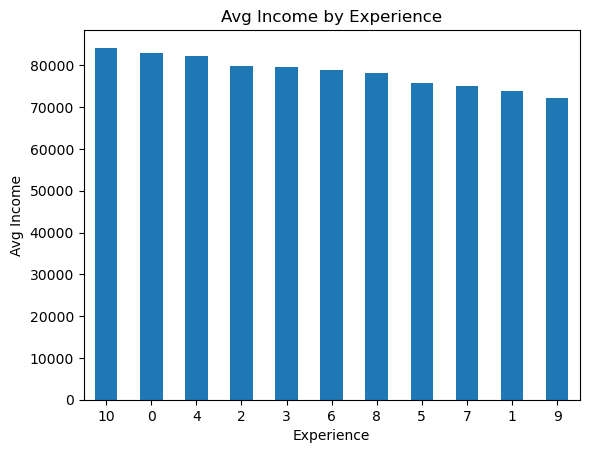

In [561]:
df.groupby('experience')['income'].mean().sort_values(ascending = False).plot(kind = 'bar', rot = 0,
                                                                              title = 'Avg Income by Experience',
                                                                              xlabel = 'Experience',
                                                                              ylabel = 'Avg Income')
plt.show()

**Observation:** Although the avg income highest for 10 years of experience, it is 2nd highest for 0 years of experience and lowest for 9 years of experience. So, clearly the income is distributed randomly by experience and doesn't show any relation at all.

#### Age distribution by Remote Status

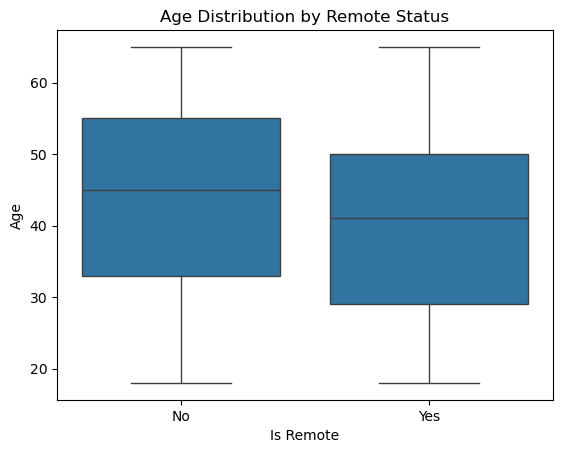

In [565]:
sns.boxplot(data = df, x = 'remote', y = 'age')
plt.title('Age Distribution by Remote Status')
plt.xlabel('Is Remote')
plt.ylabel('Age')
plt.show()

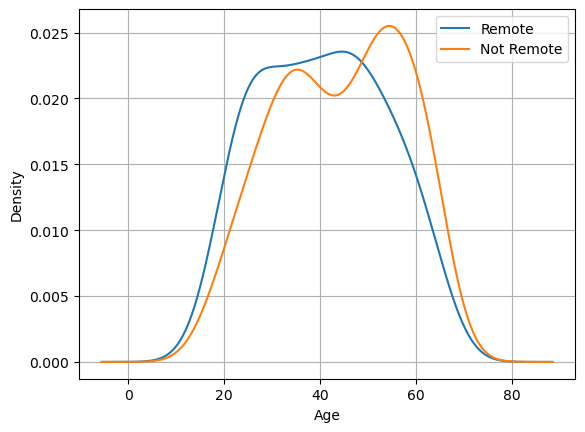

In [567]:
df[df['remote'] == 'Yes']['age'].plot(kind = 'kde', label = 'Remote')
df[df['remote'] == 'No']['age'].plot(kind = 'kde', label = 'Not Remote')
plt.legend()
plt.xlabel('Age')
plt.grid()
plt.show()

**Observation:** People with age less than 50 are more likely to take a remote job whereas people older than 50 prefers on-site jobs.

### Employment Status Analysis

#### Employment Status by Job Category

In [572]:
pd.crosstab(df['employment_status'], df['job_category'], normalize = 1)*100

job_category,A,B,C,Unknown
employment_status,,,,
employed,38.970588,32.051282,23.4375,31.282051
freelancer,35.294118,33.974359,45.3125,36.923077
unemployed,25.735294,33.974359,31.2500,31.794872


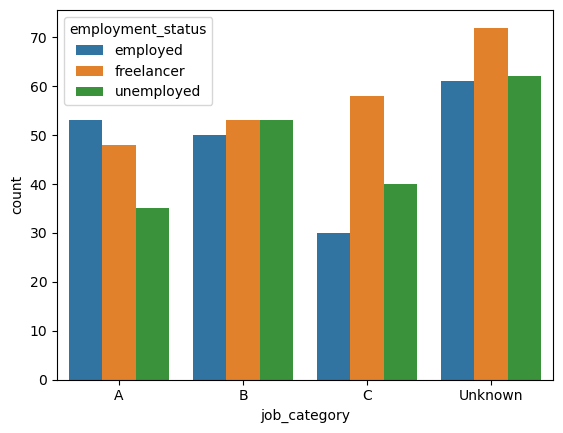

In [574]:
grouped = df.groupby(['job_category', 'employment_status'], observed = True).size().reset_index(name = 'count')
sns.barplot(data = grouped, x = 'job_category', y = 'count', hue = 'employment_status')
plt.show()

**Observation:** Only 25% of people who worked on a job with category A are unemployed currently, whereas in category B and C only almost 34% and 31% are unemployed. This can follow from the fact that group A has a lower income than other categories, meaning less layoffs from group A.

#### Employment Status by Gender

In [578]:
pd.crosstab(df['employment_status'], df['gender'], normalize = 1)*100

gender,F,M,Other
employment_status,,,
employed,34.883721,30.000000,27.927928
freelancer,35.658915,40.833333,44.144144
unemployed,29.457364,29.166667,27.927928


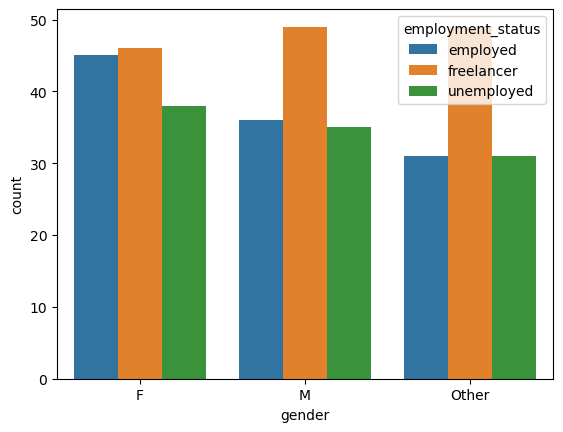

In [580]:
grouped = df.groupby(['gender', 'employment_status'], observed = True).size().reset_index(name = 'count')
sns.barplot(data = grouped, x = 'gender', y = 'count', hue = 'employment_status')
plt.show()

**Observation:** 35% females are freelancers whereas 40% and 44% males and other genders are freelancers respectively.

#### Age Distribution by Employment Status

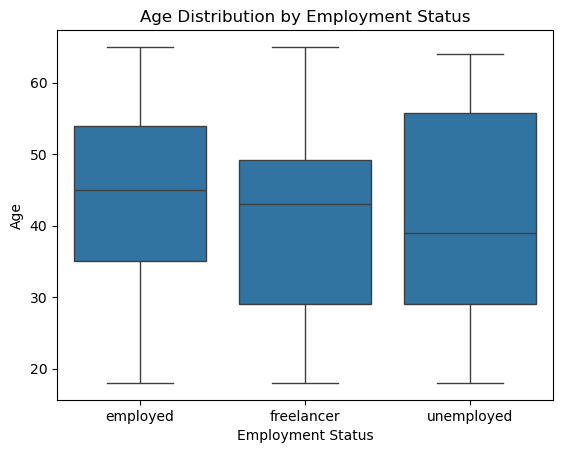

In [584]:
sns.boxplot(data = df, x = 'employment_status', y = 'age')
plt.title('Age Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.show()

In [586]:
df.groupby('employment_status', observed = True)['age'].mean()

employment_status
employed      44.393443
freelancer    40.014706
unemployed    41.542857
Name: age, dtype: Float64

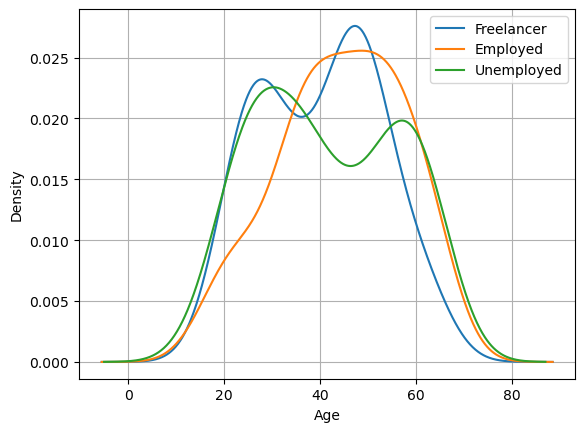

In [588]:
df[df['employment_status'] == 'freelancer']['age'].plot(kind = 'kde', label = 'Freelancer')
df[df['employment_status'] == 'employed']['age'].plot(kind = 'kde', label = 'Employed')
df[df['employment_status'] == 'unemployed']['age'].plot(kind = 'kde', label = 'Unemployed')
plt.legend()
plt.xlabel('Age')
plt.grid()
plt.show()

**Observations:**
- In the age group 18 to 35 people are more likely to be unemployed or working as a freelancer.
- In the age group 35 to 60 people are less likely to be unemployed which explains the avg age of employed peoples being higher.

#### Experience Distribution by Employment Status

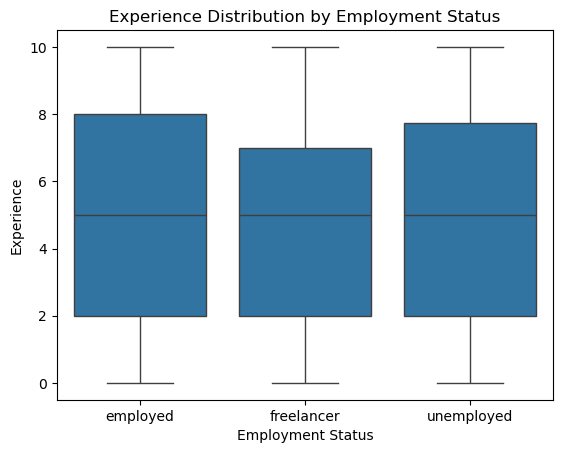

In [592]:
sns.boxplot(data = df, x = 'employment_status', y = 'experience')
plt.title('Experience Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Experience')
plt.show()

In [594]:
df.groupby('employment_status', observed = True)['experience'].mean()

employment_status
employed      4.917526
freelancer    4.792208
unemployed    4.852632
Name: experience, dtype: Float64

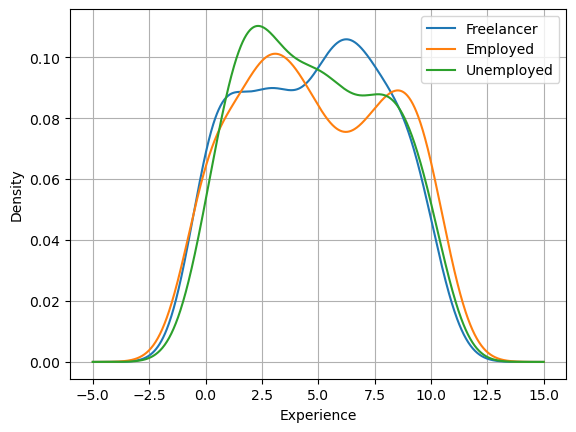

In [596]:
df[df['employment_status'] == 'freelancer']['experience'].plot(kind = 'kde', label = 'Freelancer')
df[df['employment_status'] == 'employed']['experience'].plot(kind = 'kde', label = 'Employed')
df[df['employment_status'] == 'unemployed']['experience'].plot(kind = 'kde', label = 'Unemployed')
plt.legend()
plt.xlabel('Experience')
plt.grid()
plt.show()

**Observations:** People with less than 5 years of experience are more likely to be unemployed whereas people with more than 5 years of experience people tends to shift towards freelancing.

In [598]:
df.to_csv('cleaned_dataset.csv')